In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [2]:
df = pd.read_csv('Alan.csv')
df.head

<bound method NDFrame.head of          Unnamed: 0             Date_UTC  dbn_nez  dbe_nez  dbz_nez     SZA  \
0                 0  2009-01-01T00:00:00      5.1    -16.8    -12.4  110.65   
1                 1  2009-01-01T00:01:00      5.1    -16.8    -12.4  110.71   
2                 2  2009-01-01T00:02:00      6.4    -17.2    -11.4  110.78   
3                 3  2009-01-01T00:03:00      5.9    -16.4    -10.4  110.84   
4                 4  2009-01-01T00:04:00      6.3    -15.1    -10.4  110.91   
...             ...                  ...      ...      ...      ...     ...   
7888315     7888315  2022-12-31T23:55:00      NaN      NaN      NaN  110.37   
7888316     7888316  2022-12-31T23:56:00      NaN      NaN      NaN  110.43   
7888317     7888317  2022-12-31T23:57:00      NaN      NaN      NaN  110.50   
7888318     7888318  2022-12-31T23:58:00      NaN      NaN      NaN  110.56   
7888319     7888319  2022-12-31T23:59:00      NaN      NaN      NaN  110.63   

         Labels  
0  

In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7888320 entries, 0 to 7888319
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Date_UTC    object 
 2   dbn_nez     float64
 3   dbe_nez     float64
 4   dbz_nez     float64
 5   SZA         float64
 6   Labels      float64
dtypes: float64(5), int64(1), object(1)
memory usage: 421.3+ MB


Unnamed: 0         0
Date_UTC           0
dbn_nez       650564
dbe_nez       650564
dbz_nez       650564
SZA                0
Labels             0
dtype: int64

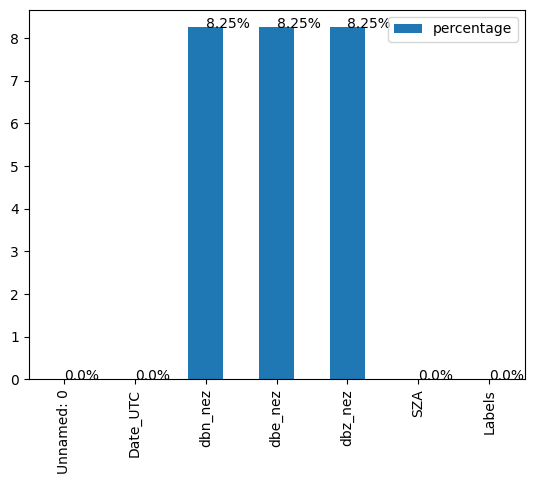

In [4]:
# missing values #
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values 
missing_percentage = round(missing_count / value_count * 100,2) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
# print(missing_df)

# visualize missing value#
barchart = missing_df.plot.bar(y='percentage')
for index, percentage in enumerate(missing_percentage):
    barchart.text(index, percentage, str(percentage) + '%' )


['Unnamed: 0', 'dbn_nez', 'dbe_nez', 'dbz_nez', 'SZA', 'Labels']
['Date_UTC']


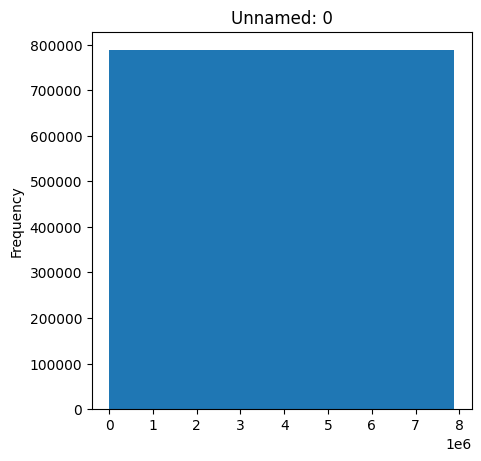

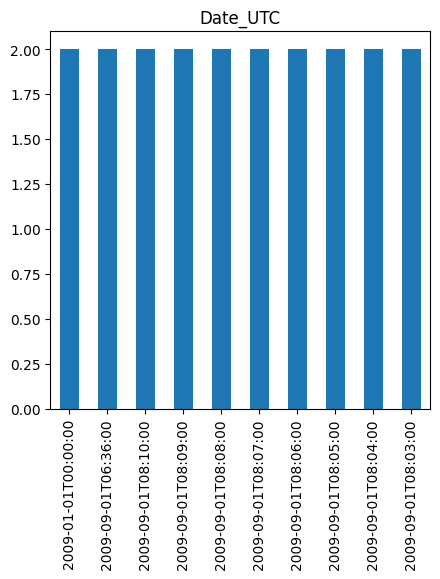

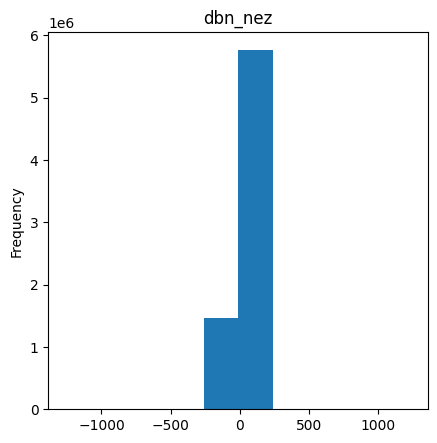

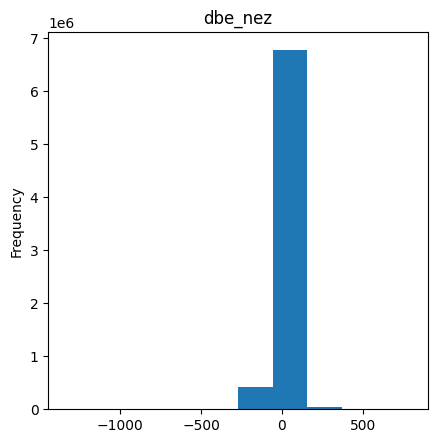

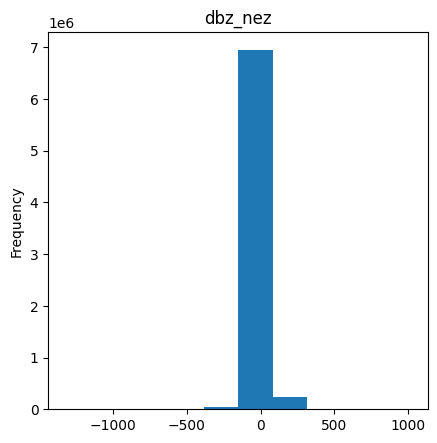

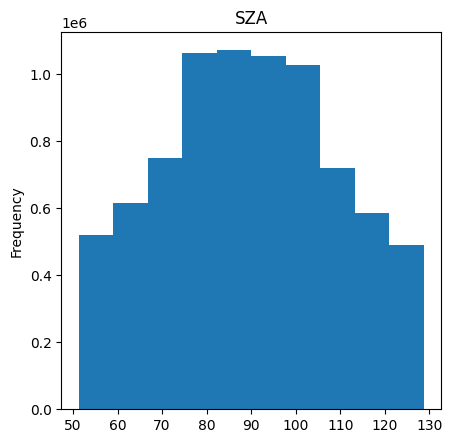

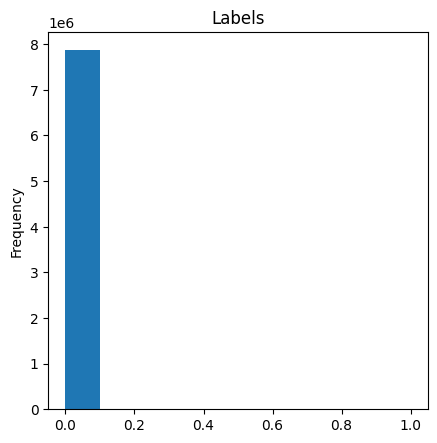

In [5]:
# populate the list of numeric attributes and categorical attributes
num_list = []
cat_list = []

for column in df:
 if is_numeric_dtype(df[column]):
        num_list.append(column)
 elif is_string_dtype(df[column]):
        cat_list.append(column)    

print(num_list)
print(cat_list)


### 3. Univaraite Analysis ###

# bar chart and histogram
for column in df:
       plt.figure(column, figsize = (4.9,4.9))
       plt.title(column)
       if is_numeric_dtype(df[column]):
               df[column].plot(kind = 'hist')
       elif is_string_dtype(df[column]):
       # show only the TOP 10 value count in each categorical data
              df[column].value_counts()[:10].plot(kind = 'bar')


/var/folders/0q/7qqchjfd3h7gd1zmyqrf1rxw0000gn/T/ipykernel_37113/2374652492.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

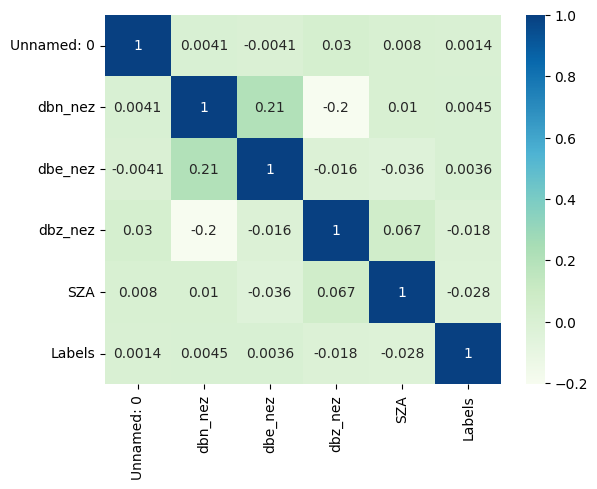

In [6]:
### 4. Multivariate Analysis ###

# correation matrix and heatmap
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

DRIFT DIRECTION MATCHES THIS PLOT ^^^

In [7]:
# grouped bar chart
for i in range(0, len(cat_list)):
       primary_cat = cat_list[i]
       for j in range(0, len(cat_list)):
              secondary_cat = cat_list[j]
       if secondary_cat != primary_cat:
              plt.figure (figsize = (15,15))
              chart = sns.countplot(
                     data = df,
                     x= primary_cat, 
                     hue= secondary_cat,
                     palette = 'GnBu',
                     order=df[primary_cat].value_counts().iloc[:10].index #show only TOP10
                     )

In [8]:
# # Takes too Long
# # pairplot
# sns.pairplot(df,height = 2.5)
# 
# # pairplot with hue
# for i in range(0, len(cat_list)):
#     hue_cat = cat_list[i]
#     sns.pairplot(df, hue = hue_cat)
# 
# # box plot
# for i in range(0, len(cat_list)):
#        cat = cat_list[i]
#        for j in range(0, len(num_list)):
#               num = num_list[j]
#               plt.figure (figsize = (15,15))
#               sns.boxplot( x = cat, y = num, data = df, palette = "GnBu")

In [9]:
df = pd.read_csv('Alan.csv', usecols=["dbn_nez", "dbe_nez", "dbz_nez","Labels"])
df.head

<bound method NDFrame.head of          dbn_nez  dbe_nez  dbz_nez  Labels
0            5.1    -16.8    -12.4     0.0
1            5.1    -16.8    -12.4     0.0
2            6.4    -17.2    -11.4     0.0
3            5.9    -16.4    -10.4     0.0
4            6.3    -15.1    -10.4     0.0
...          ...      ...      ...     ...
7888315      NaN      NaN      NaN     0.0
7888316      NaN      NaN      NaN     0.0
7888317      NaN      NaN      NaN     0.0
7888318      NaN      NaN      NaN     0.0
7888319      NaN      NaN      NaN     0.0

[7888320 rows x 4 columns]>

In [10]:
df2 = df.fillna(0)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df2.drop(['Labels'], axis=1)
y = df2["Labels"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

model_pipeline = []
model_pipeline.append(LogisticRegression(solver = 'liblinear'))
# model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
# model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [13]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']
model_list = ['Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes']
acc_list = []
auc_list = []
cm_list = []

# for model in model_pipeline:
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     acc_list.append(metrics.accuracy_score(y_test, y_pred))
#     fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
#     auc_list.append(round(metrics.auc(fpr, tpr),2))
#     cm_list.append(confusion_matrix(y_test, y_pred))
    

In [14]:
model = model_pipeline[0]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_list.append(metrics.accuracy_score(y_test, y_pred))
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
auc_list.append(round(metrics.auc(fpr, tpr),2))
cm_list.append(confusion_matrix(y_test, y_pred))

In [15]:
# model = model_pipeline[1]
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# acc_list.append(metrics.accuracy_score(y_test, y_pred))
# fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
# auc_list.append(round(metrics.auc(fpr, tpr),2))
# cm_list.append(confusion_matrix(y_test, y_pred))

In [16]:
model = model_pipeline[1]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_list.append(metrics.accuracy_score(y_test, y_pred))
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
auc_list.append(round(metrics.auc(fpr, tpr),2))
cm_list.append(confusion_matrix(y_test, y_pred))

In [ ]:
model = model_pipeline[2]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_list.append(metrics.accuracy_score(y_test, y_pred))
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
auc_list.append(round(metrics.auc(fpr, tpr),2))
cm_list.append(confusion_matrix(y_test, y_pred))

In [ ]:
# model = model_pipeline[4]
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# acc_list.append(metrics.accuracy_score(y_test, y_pred))
# fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
# auc_list.append(round(metrics.auc(fpr, tpr),2))
# cm_list.append(confusion_matrix(y_test, y_pred))

In [ ]:
model = model_pipeline[3]
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_list.append(metrics.accuracy_score(y_test, y_pred))
fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred)
auc_list.append(round(metrics.auc(fpr, tpr),2))
cm_list.append(confusion_matrix(y_test, y_pred))


Models
['Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes']

Accuracies
[0.9975948333285954, 0.9999934694404387, 0.9999965426449381, 0.9968507336891592]

AUCs
[0.5, 1.0, 1.0, 0.51]

Confusion Matrix
Logistic Regression :
 [[2596885       1]
 [   6260       0]]
KNN :
 [[2596878       8]
 [      9    6251]]
Decision Tree :
 [[2596881       5]
 [      4    6256]]
Naive Bayes :
 [[2594779    2107]
 [   6091     169]]


Text(0.5, 1.0, 'Naive Bayes Confusion Matrix:')

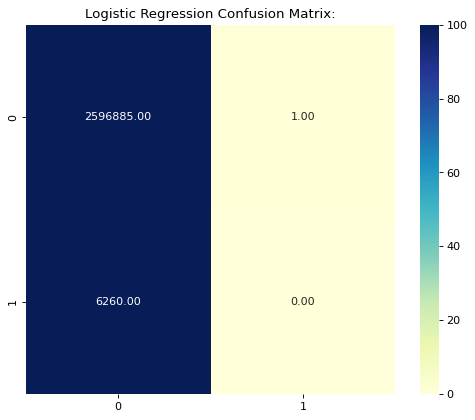

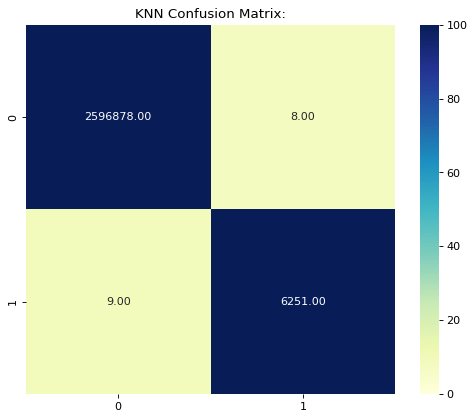

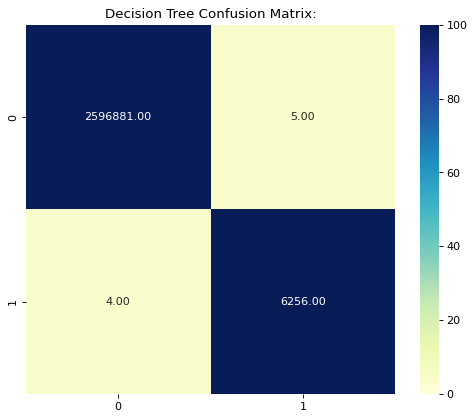

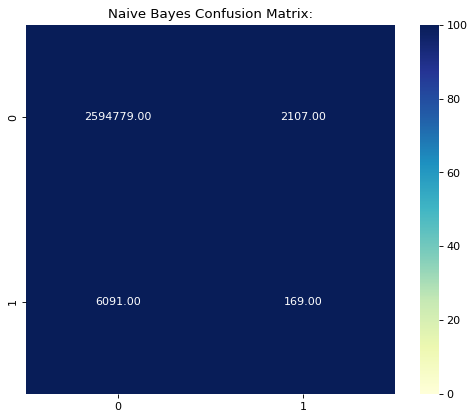

In [ ]:
# model_list = ['Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes']
print("\nModels")
print(model_list)
print("\nAccuracies")
print(acc_list)
print("\nAUCs")
print(auc_list)
print("\nConfusion Matrix")
c = 0
for j in cm_list:
    print(model_list[c], ":\n", j)
    # disp = ConfusionMatrixDisplay(confusion_matrix=i, display_labels=model.classes_)
    # disp.plot()
    c += 1
# print(cm_list)
count = 0
for i in range(0,len(cm_list)):
    ax.set_title(str(model_list[i-1]) + " Confusion Matrix:")
    ax.set_xlabel(["FB Present","FB Not Present"])
    ax.set_ylabel(["Predicted True ","Predicted False"])
    fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = sns.heatmap(cm_list[i], annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0)
    count+=1
ax.set_title(str(model_list[i]) + " Confusion Matrix:")

Text(0.5, 1.0, 'Naive Bayes Confusion Matrix:')

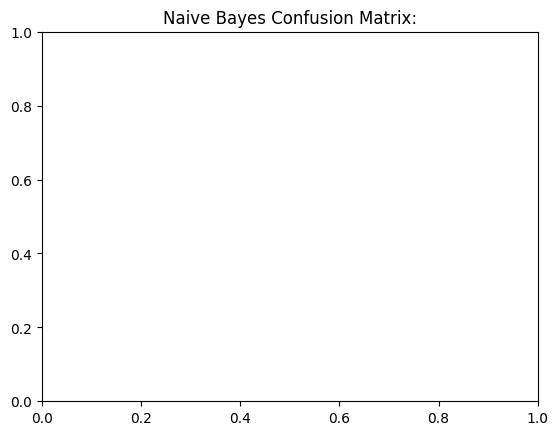

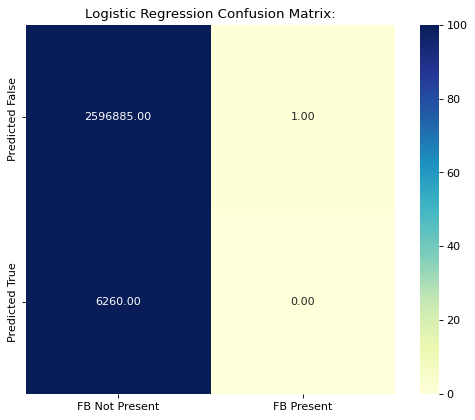

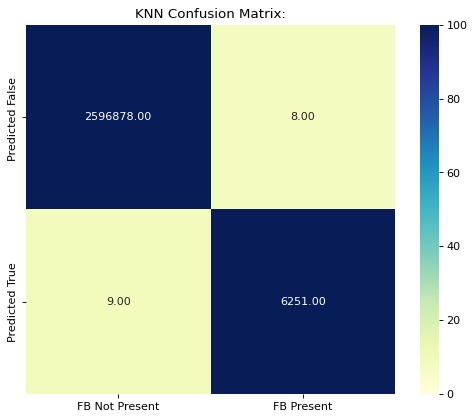

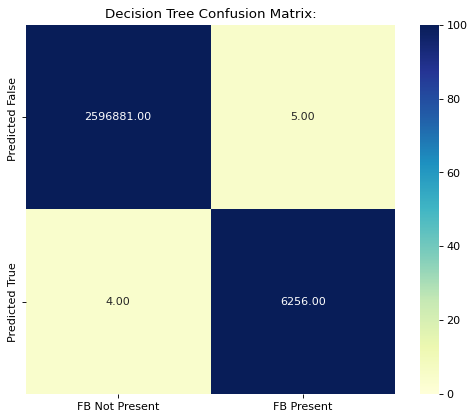

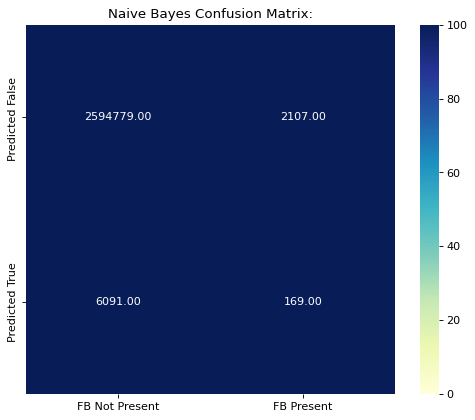

In [7]:
# Confusion Matrix
# Logistic Regression :
cm_list = []
cm_list.append([[2596885,1],
 [6260,0]])
# KNN :
cm_list.append([[2596878,       8],
 [      9,    6251]])
# Decision Tree :
cm_list.append([[2596881,       5],
 [      4,    6256]])
# Naive Bayes :
cm_list.append([[2594779,    2107],
 [   6091,     169]])
model_list = ["Logistic Regression","KNN","Decision Tree", "Naive Bayes"]
count = 0
__, ax = plt.subplots()
for i in range(0,len(cm_list)):
    ax.set_title(str(model_list[i-1]) + " Confusion Matrix:")
    # ax.set_xlabel(["FB Present","FB Not Present"])
    # ax.set_ylabel(["Predicted True ","Predicted False"])
    fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    res = sns.heatmap(cm_list[i], annot=True, fmt='.2f', cmap="YlGnBu", vmin=0.0, vmax=100.0, xticklabels=["FB Not Present","FB Present"], yticklabels=["Predicted False ","Predicted True"])
    count+=1
ax.set_title(str(model_list[i]) + " Confusion Matrix:")